In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('survey lung cancer.csv')
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['GENDER_encoder']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER_encoded'] = le.fit_transform(df['LUNG_CANCER'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_encoder,LUNG_CANCER_encoded
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


In [3]:
q1=df['AGE'].quantile(0.25)
q3=df['AGE'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df['AGE']=np.where(df['AGE']<=lower,df['AGE'].median(),df['AGE'])
df['AGE']=np.where(df['AGE']>=upper,df['AGE'].median(),df['AGE'])
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_encoder,LUNG_CANCER_encoded
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,0,1
305,M,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,1,1
306,M,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,1,1
307,M,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,1,1


<Axes: ylabel='AGE'>

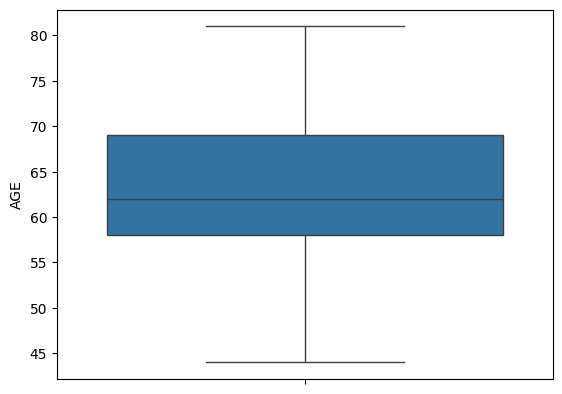

In [4]:
sns.boxplot(df['AGE'])

In [5]:
from sklearn.model_selection import train_test_split
x=df.drop(['GENDER','LUNG_CANCER','GENDER_encoder','LUNG_CANCER_encoded'],axis=1)
y=df['LUNG_CANCER_encoded']


In [7]:
x_trian,x_test,y_trian,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,oob_score=True)
rf

RandomForestClassifier(n_estimators=500, oob_score=True)

In [8]:
rf.fit(x_trian,y_trian)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9032258064516129
[[ 5  5]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62

